In [95]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.pyplot import plot as plt
from matplotlib.colors import ListedColormap

In [97]:
df_raw = pd.read_csv('./KaDo.csv')

In [98]:
df_raw.columns

Index(['TICKET_ID', 'MOIS_VENTE', 'PRIX_NET', 'FAMILLE', 'UNIVERS', 'MAILLE',
       'LIBELLE', 'CLI_ID'],
      dtype='object')

In [99]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [100]:
df = df_raw.copy()

In [101]:
df = df.filter(['MOIS_VENTE', 'PRIX_NET', 'CLI_ID'])

In [102]:
df["NB_T"] = 1

In [103]:
df.columns

Index(['MOIS_VENTE', 'PRIX_NET', 'CLI_ID', 'NB_T'], dtype='object')

In [ ]:
df.head()

,MOIS_VENTE,PRIX_NET,CLI_ID,NB_T
0,10,1.67,1490281,1
1,10,1.66,1490281,1
2,10,7.45,1490281,1
3,10,5.95,1490281,1
4,10,1.67,1490281,1


In [104]:
 cart_df = df.groupby(["MOIS_VENTE", "CLI_ID"], as_index=True).sum()

In [ ]:
cart_df.head()

PRIX_NET  NB_T
MOIS_VENTE CLI_ID                   
12         997048563      6.95     2
           997048597    255.90    51
           997048729      7.80     4
           997048769      3.95     1
           997385337     23.80     3

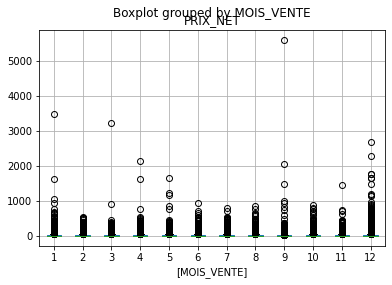

In [ ]:
import matplotlib.pyplot as pplt
axes = pd.DataFrame(cart_df["PRIX_NET"]).boxplot(by="MOIS_VENTE", return_type='axes')

In [ ]:
cart_df.groupby("MOIS_VENTE")["PRIX_NET", "NB_T"].head()


<ipython-input-16-481fc4c84e6d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cart_df.groupby("MOIS_VENTE")["PRIX_NET", "NB_T"].head()


PRIX_NET  NB_T
MOIS_VENTE CLI_ID                   
1          20163348       7.45     1
           20200041       6.70     2
           20727324      13.25     5
           21046542      11.30     4
           21239163      12.65     5
2          21046542      38.90     6
           21504227       1.95     1
           69813934       6.45     1
           85841284       9.80     2
           195207210      8.45     3
3          20561854       7.05     3
           69813934      21.35     5
           90822328      42.80     4
           131204016      2.95     1
           195207210     17.00     3
4          21497331      33.35     4
           69813934       3.45     1
           195207210     14.00     1
           242424645      5.00     3
           275493987      9.40     2
5          20791601      23.80     4
           21514622      17.90     2
           69813934       3.75     2
           85841284      19.85     4
           100064590     17.85     3
6          21046542      37.55     6
           69813934      23.35     8
           85057203      13.75     2
           85841284      17.65     5
           90822328      12.55     4
7          21046542      78.45    16
           69813934       9.45     4
           85841284      20.45     2
           100064590     29.70     6
           131204016      3.00     1
8          69813934       9.35     4
           85057203       9.75     1
           169985247     46.75     8
           195207210      4.50     2
           206111880      1.50     1
9          13290776      18.50     2
           69813934       1.95     1
           169985247     67.60     6
           206111880      2.25     1
           243624087      8.95     2
10         1490281       18.40     5
           69813934      18.00     1
           85841284      56.95     4
           126716008     26.50     1
           275493987     29.90     1
11         71891681      19.85     3
           169985247     41.00    11
           195207210     14.40     3
           321933797     11.95     1
           356832238     10.90     2
12         13290776      37.00     7
           69813934       5.75     3
           71891681      24.40    12
           85841284       7.95     1
           100064590     41.05    16

In [ ]:
cart_df.tail()


PRIX_NET  NB_T
MOIS_VENTE CLI_ID                   
12         997048563      6.95     2
           997048597    255.90    51
           997048729      7.80     4
           997048769      3.95     1
           997385337     23.80     3

In [105]:
import matplotlib.pyplot as pplt


In [ ]:
color_map = pplt.get_cmap('inferno') 
reversed_color_map = color_map.reversed()

In [108]:
cart_df_reset_index = cart_df.reset_index()
cart_df_reset_index[cart_df_reset_index["MOIS_VENTE"] == 12].head()

,MOIS_VENTE,CLI_ID,PRIX_NET,NB_T
2046371,12,13290776,37.00,7
2046372,12,69813934,5.75,3
2046373,12,71891681,24.40,12
2046374,12,85841284,7.95,1
2046375,12,100064590,41.05,16


In [ ]:
from sklearn import preprocessing

x = cart_df_reset_index["PRIX_NET"].values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
f = lambda x: x * 500
cart_df_reset_index["SCALE_PRIX_NET"] = pd.Series(f(x_scaled[:, 0]))
cart_df_reset_index[cart_df_reset_index["MOIS_VENTE"] == 12]["SCALE_PRIX_NET"].describe()

count    257419.000000
mean          1.867981
std           2.131743
min           0.043752
25%           0.708955
50%           1.351836
75%           2.396518
max         238.276793
Name: SCALE_PRIX_NET, dtype: float64

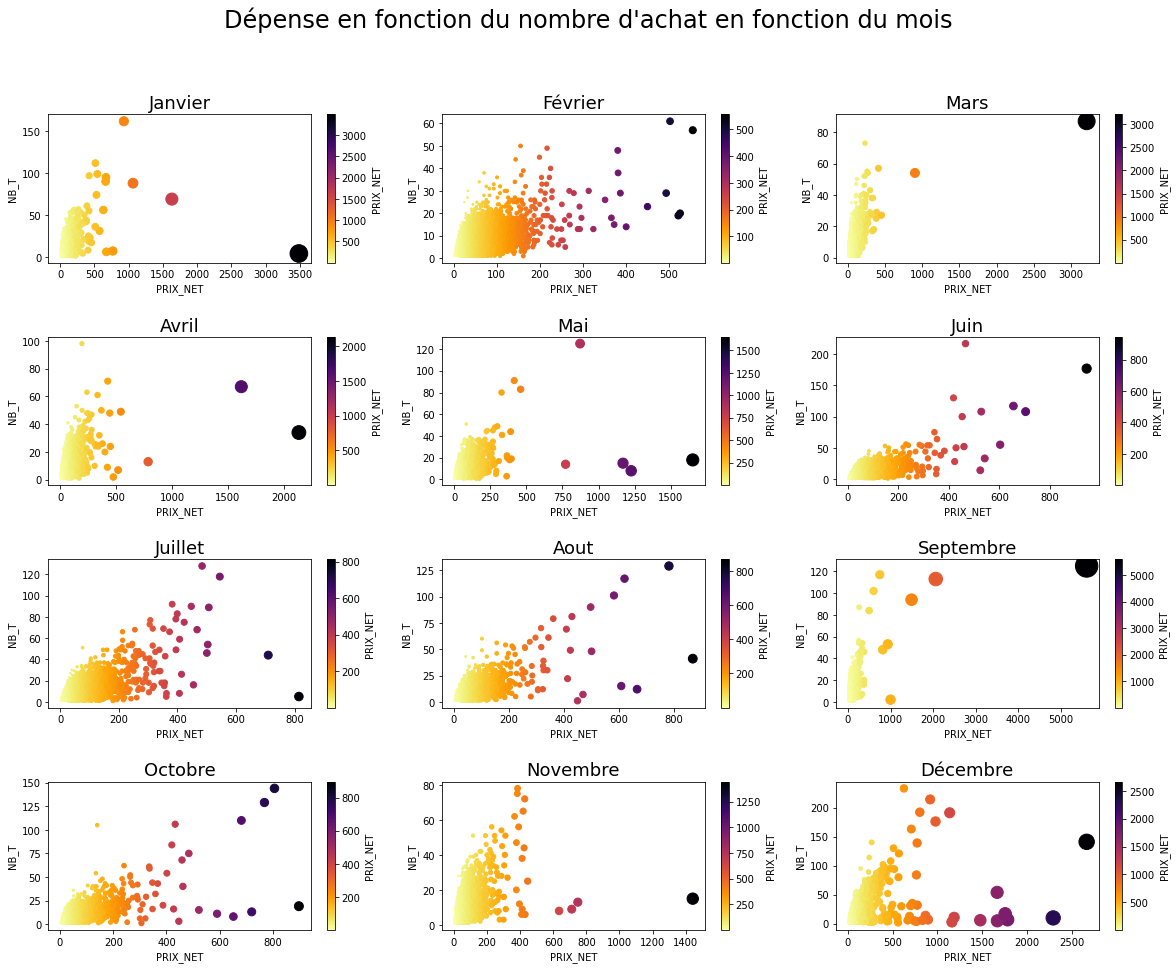

In [ ]:
month = range(1, 13)
nrow=4
ncol=3
df_list = []
fig, axes = pplt.subplots(nrow, ncol, figsize=(20,15))
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Décembre"]
count = 0

pplt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
fig.suptitle("Dépense en fonction du nombre d'achat en fonction du mois", fontsize=24)
for m in month:
    df_list.append(cart_df_reset_index[cart_df_reset_index["MOIS_VENTE"] == m])
for i, ax in enumerate(axes.ravel()): # 2
    ax.set_title(months[i], fontsize=18) # 3
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot.scatter(s="SCALE_PRIX_NET", x="PRIX_NET", y="NB_T", c="PRIX_NET", colormap=reversed_color_map, ax=axes[r,c])
        count += 1

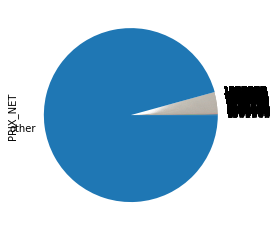

In [171]:
# top_client = cart_df_reset_index[cart_df_reset_index["MOIS_VENTE"] == 9].sort_values("PRIX_NET", ascending=False)
# temp2 = top_client.head(10)
# temp2 = temp2.set_index("CLI_ID").drop(["MOIS_VENTE", "NB_T"], axis=1)
# if len(top_client) > 10:
#      temp2 = sum(top_client["PRIX_NET"][10:])
# Sort the DataFrame in descending order; will create a Series
s_temp = cart_df_reset_index[cart_df_reset_index["MOIS_VENTE"] == 9]["PRIX_NET"].sort_values(ascending=False)
# # Count how many rows are not in the top ten
not_top_ten = len(s_temp) - 1000
    
# Sum the values not in the top ten
not_top_ten_sum = s_temp.tail(not_top_ten).sum()

# Get the top ten values
s_top = s_temp.head(1000)

# Append the sum of not-top-ten values to the Series
s_top["other"] = not_top_ten_sum
_ = s_top.plot.pie()

# Show plot
pplt.show()


In [ ]:
cart_df.tail(10)

PRIX_NET  NB_T
MOIS_VENTE CLI_ID                   
12         997048464     27.00     1
           997048480     60.50     9
           997048498     56.15     9
           997048539     12.80     4
           997048555      5.65     3
           997048563      6.95     2
           997048597    255.90    51
           997048729      7.80     4
           997048769      3.95     1
           997385337     23.80     3

In [ ]:
cart_df.columns

Index(['PRIX_NET', 'NB_T'], dtype='object')

In [ ]:
bar_chart_df = cart_df["PRIX_NET"]
bar_chart_df.T.unstack().shape

(12, 853514)